<h1 align="center">Exercise</h1>


## Introduction

Today we will work only with the `shops.csv`. Each shop


## Exercise 1: Detect repeted shops

There are 4 repeted shops (8 different shop_ids). Look at the shop_name and find repeated shops. This is important because need to remove duplicated shops in the future.

Please complete this:

- Ids of repepeated shop 1: st. Chkalov 39m?	10 and st. Chkalov 39m?	11
- Ids of repepeated shop 2: Mega and Mega
- Ids of repepeated shop 3: ____ and ____
- Ids of repepeated shop 4: ____ and ____


## Exercise 2: Physical vs Online shop

Create a binary column to determint if the shop is online or not.

## Exercise 3: Get the cities

Extract the city name of each shop. Cities apears on the first word of the shop name.


## Exercise 4: Latitude & Longitude

Get Latitude an Longitude of each city. You can use the `geopy` package.

In [3]:
!pip install https://github.com/matplotlib/basemap/archive/master.zip

  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759567 sha256=af0b6cb17a83e29aff67f363d046dd497b59a233a40691640ebccfcb85138e7f
  Stored in directory: /tmp/pip-ephem-wheel-cache-3m0waasy/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


In [42]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
import seaborn as sns
import gc
import pickle
import time
from itertools import product
import lightgbm as lgb
from lightgbm import plot_importance
import sklearn.metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

from google.colab import files
#uploaded = files.upload()

print('Done')

Saving 800px-Russia_rel_location_map.png to 800px-Russia_rel_location_map.png
Done


In [5]:
### Loading data https://www.kaggle.com/deepdivelm/predict-future-sales-eng-translation?select=shops.csv

df_shops       = pd.read_csv('shops.csv')
df_shops

,shop_name,shop_id
0,"! Yakutsk Ordzhonikidze, 56 francs",0
1,"! Yakutsk TC ""Central"" fran",1
2,"Adygea TC ""Mega""",2
3,"Balashikha TC ""Oktyabr-Kinomir""",3
4,"Volga TC ""Volga Mall""",4
5,"Vologda SEC ""Marmelad""",5
6,"Voronezh (Plekhanovskaya, 13)",6
7,"Voronezh SEC ""Maksimir""",7
8,"Voronezh SEC City-Park ""Grad""",8
9,Outbound Trade,9


In [6]:
df_shops.isna().any()

shop_name    False
shop_id      False
dtype: bool

In [7]:
df_shops['location'] = df_shops['shop_name'].str.split(' ').str[1]
#df_shops['shop_name'] = df_shops['shop_name'].str.split(' ').str[1]

In [8]:
df = df_shops

In [17]:
df['location'] = df['location'].str.replace('"', '')
#df

In [10]:
# St. Petersburg
df['location'] = df['location'].str.replace("St.", "St. Petersburg")
df
#df['range'] = df['range'].str.replace(',','-')

,shop_name,shop_id,location
0,"! Yakutsk Ordzhonikidze, 56 francs",0,Yakutsk
1,"! Yakutsk TC ""Central"" fran",1,Yakutsk
2,"Adygea TC ""Mega""",2,Adygea
3,"Balashikha TC ""Oktyabr-Kinomir""",3,Balashikha
4,"Volga TC ""Volga Mall""",4,Volga
5,"Vologda SEC ""Marmelad""",5,Vologda
6,"Voronezh (Plekhanovskaya, 13)",6,Voronezh
7,"Voronezh SEC ""Maksimir""",7,Voronezh
8,"Voronezh SEC City-Park ""Grad""",8,Voronezh
9,Outbound Trade,9,Outbound


In [22]:
# Internet-shop or Digital

df['shop_type'] = df['location'].map(lambda x: True if 'Digital' or 'Internet-shop' in x else False)

In [18]:
#df.iloc[12, df.columns.get_loc('shop_type')] = False
#df.iloc[55, df.columns.get_loc('shop_type')] = False

In [19]:
df

,shop_name,shop_id,location,shop_type
0,"! Yakutsk Ordzhonikidze, 56 francs",0,Yakutsk,True
1,"! Yakutsk TC ""Central"" fran",1,Yakutsk,True
2,"Adygea TC ""Mega""",2,Adygea,True
3,"Balashikha TC ""Oktyabr-Kinomir""",3,Balashikha,True
4,"Volga TC ""Volga Mall""",4,Volga,True
5,"Vologda SEC ""Marmelad""",5,Vologda,True
6,"Voronezh (Plekhanovskaya, 13)",6,Voronezh,True
7,"Voronezh SEC ""Maksimir""",7,Voronezh,True
8,"Voronezh SEC City-Park ""Grad""",8,Voronezh,True
10,Zhukovsky st. Chkalov 39m?,10,Zhukovsky,True


In [23]:
# droping outbound invalid

index_names = df[ df['location'] == 'Outbound' ].index
  
# drop these row indexes
# from dataFrame
df.drop(index_names, inplace = True)
  
df

,shop_name,shop_id,location,shop_type
0,"! Yakutsk Ordzhonikidze, 56 francs",0,Yakutsk,True
1,"! Yakutsk TC ""Central"" fran",1,Yakutsk,True
2,"Adygea TC ""Mega""",2,Adygea,True
3,"Balashikha TC ""Oktyabr-Kinomir""",3,Balashikha,True
4,"Volga TC ""Volga Mall""",4,Volga,True
5,"Vologda SEC ""Marmelad""",5,Vologda,True
6,"Voronezh (Plekhanovskaya, 13)",6,Voronezh,True
7,"Voronezh SEC ""Maksimir""",7,Voronezh,True
8,"Voronezh SEC City-Park ""Grad""",8,Voronezh,True
10,Zhukovsky st. Chkalov 39m?,10,Zhukovsky,True


In [24]:
## removing online locations
#df1 =df

index_names = df1[ df1['location'] == 'Internet-shop' ].index 
  
# drop these row indexes
# from dataFrame
df1.drop(index_names, inplace = True)
  
df1

,shop_name,shop_id,location,shop_type
0,"! Yakutsk Ordzhonikidze, 56 francs",0,Yakutsk,True
1,"! Yakutsk TC ""Central"" fran",1,Yakutsk,True
2,"Adygea TC ""Mega""",2,Adygea,True
3,"Balashikha TC ""Oktyabr-Kinomir""",3,Balashikha,True
4,"Volga TC ""Volga Mall""",4,Volga,True
5,"Vologda SEC ""Marmelad""",5,Vologda,True
6,"Voronezh (Plekhanovskaya, 13)",6,Voronezh,True
7,"Voronezh SEC ""Maksimir""",7,Voronezh,True
8,"Voronezh SEC City-Park ""Grad""",8,Voronezh,True
10,Zhukovsky st. Chkalov 39m?,10,Zhukovsky,True


In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


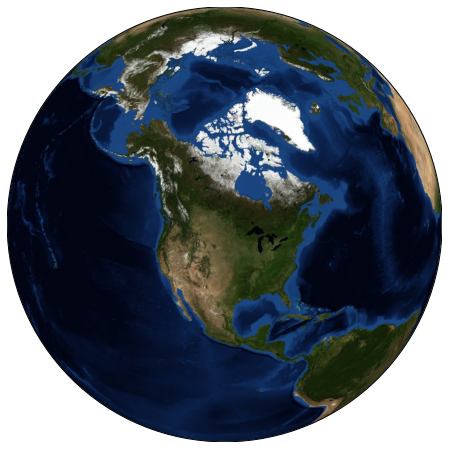

In [26]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


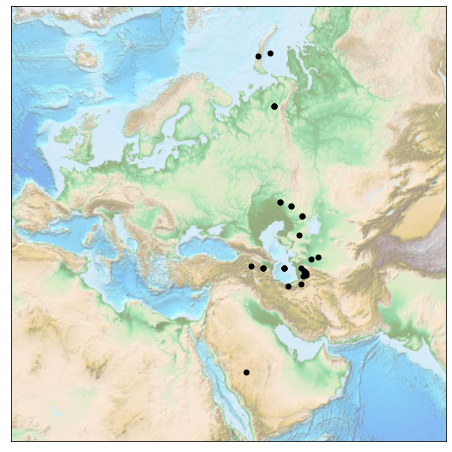

In [46]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=47.235, lon_0=39.701,)  #39.701
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(df1['Latitude'].values, df1['Longitude'].values)
plt.plot(x, y, 'ok', markersize=5)
#plt.text(x, y, ' Seattle', fontsize=12);

In [28]:
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
   
# declare an empty list to store
# latitude and longitude of values 
# of city column
longitude = []
latitude = []
   
# function to find the coordinate
# of a given city 
def findGeocode(city):
       
    # try and catch is used to overcome
    # the exception thrown by geolocator
    # using geocodertimedout  
    try:
        # Specify the user_agent as your
        # app name it should not be none
        geolocator = Nominatim(user_agent="your_app_name")
        return geolocator.geocode(city)
      
    except GeocoderTimedOut:          
        return findGeocode(city)
    
# each value from city column
# will be fetched and sent to
# function find_geocode   
for i in (df1["location"]):
    if findGeocode(i) != None:           
        loc = findGeocode(i)
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)

In [29]:
# now add this column to dataframe
df1["Longitude"] = longitude
df1["Latitude"] = latitude
  
df1

,shop_name,shop_id,location,shop_type,Longitude,Latitude
0,"! Yakutsk Ordzhonikidze, 56 francs",0,Yakutsk,True,129.732,62.027
1,"! Yakutsk TC ""Central"" fran",1,Yakutsk,True,129.732,62.027
2,"Adygea TC ""Mega""",2,Adygea,True,40.152,44.694
3,"Balashikha TC ""Oktyabr-Kinomir""",3,Balashikha,True,37.965,55.804
4,"Volga TC ""Volga Mall""",4,Volga,True,44.215,56.167
5,"Vologda SEC ""Marmelad""",5,Vologda,True,39.893,59.219
6,"Voronezh (Plekhanovskaya, 13)",6,Voronezh,True,39.201,51.661
7,"Voronezh SEC ""Maksimir""",7,Voronezh,True,39.201,51.661
8,"Voronezh SEC City-Park ""Grad""",8,Voronezh,True,39.201,51.661
10,Zhukovsky st. Chkalov 39m?,10,Zhukovsky,True,38.120,55.597


In [30]:
df1.iloc[39, df1.columns.get_loc('Longitude')] = 39.701
df1.iloc[40, df1.columns.get_loc('Longitude')] = 39.701
df1.iloc[41, df1.columns.get_loc('Longitude')] = 39.701
#  	Latitude 47.2357° N, 39.7015° E
df1.iloc[39, df1.columns.get_loc('Latitude')] = 47.235
df1.iloc[40, df1.columns.get_loc('Latitude')] = 47.235
df1.iloc[41, df1.columns.get_loc('Latitude')] = 47.235

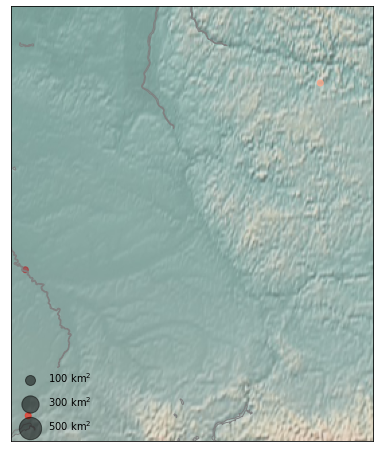

In [34]:
#df1
lat = df1['Latitude'].values
lon = df1['Longitude'].values
#population = cities['population_total'].values
#area = cities['area_total_km2'].values
shop_id =  df1['shop_id'].values

# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=60.00, lon_0=90.00,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=shop_id, 
          cmap='Reds', alpha=0.5)


# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

In [41]:
BBox = (df1.Longitude.min(), df1.Longitude.max(), df1.Latitude.min(), df1.Latitude.max())
BBox

(6.231168493722434, 129.732086, 42.6884395, 63.3233807)

In [43]:
ruh_m = plt.imread('800px-Russia_rel_location_map.png')

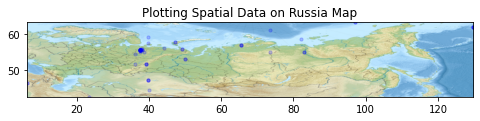

In [44]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df1.Longitude, df1.Latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Russia Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [ ]:
duplicateRowsDF = df1[df1.duplicated(['location'])]

In [ ]:
duplicateRowsDF

In [ ]:
data = {'City':['Bangalore', 'Mumbai', 'Chennai', 'Delhi']} 
    
# Convert the dictionary into DataFrame 
df = pd.DataFrame(data) 
    
# Observe the result 
df 

In [ ]:
# now add this column to dataframe
df["Longitude"] = longitude
df["Latitude"] = latitude
  
df

In [ ]:
from google.colab import files
files.download("submission2.csv")
